# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [4]:
install.packages('kohonen')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(kohonen)
set.seed(7)

In [67]:

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

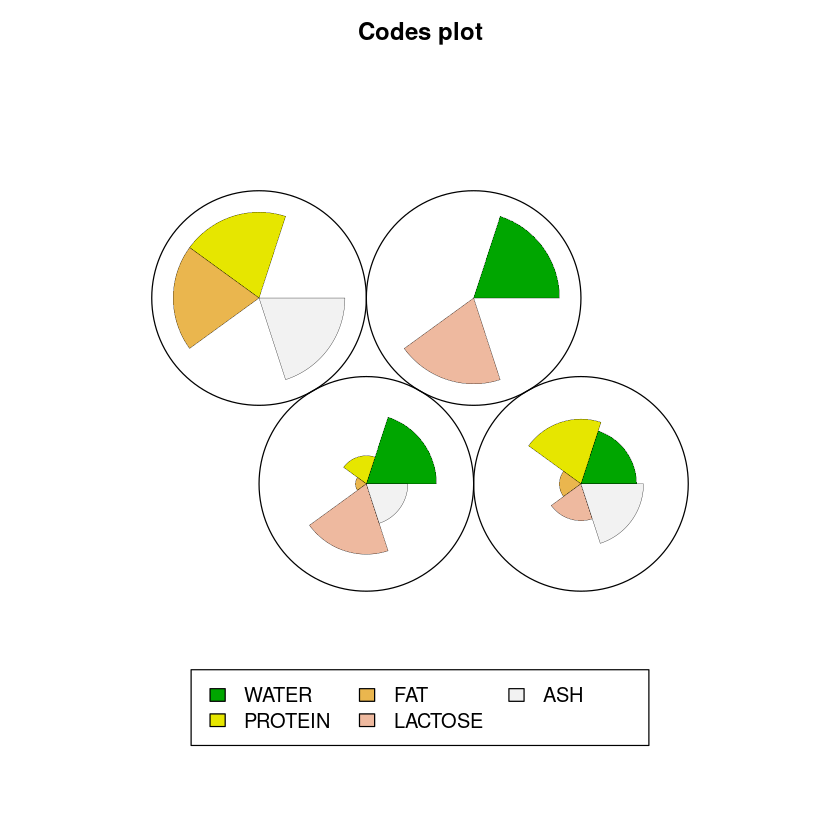

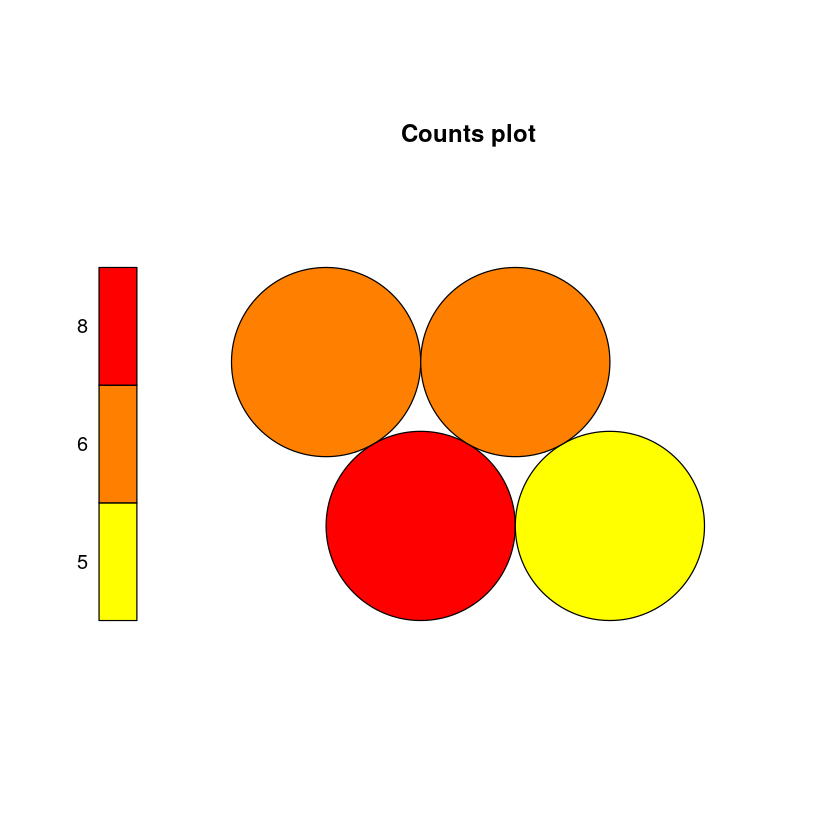

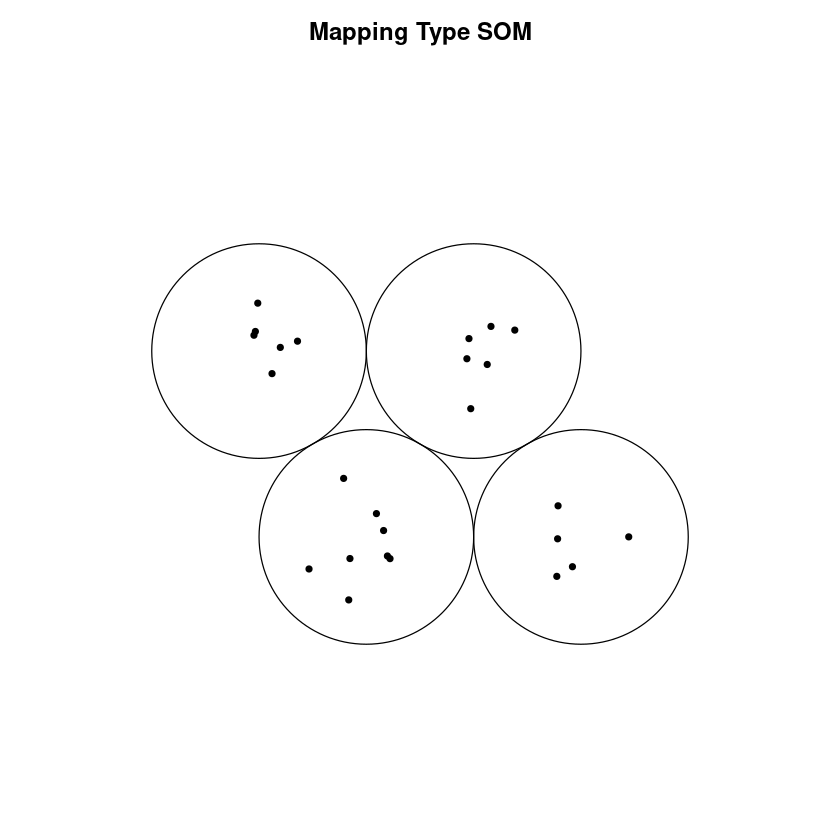

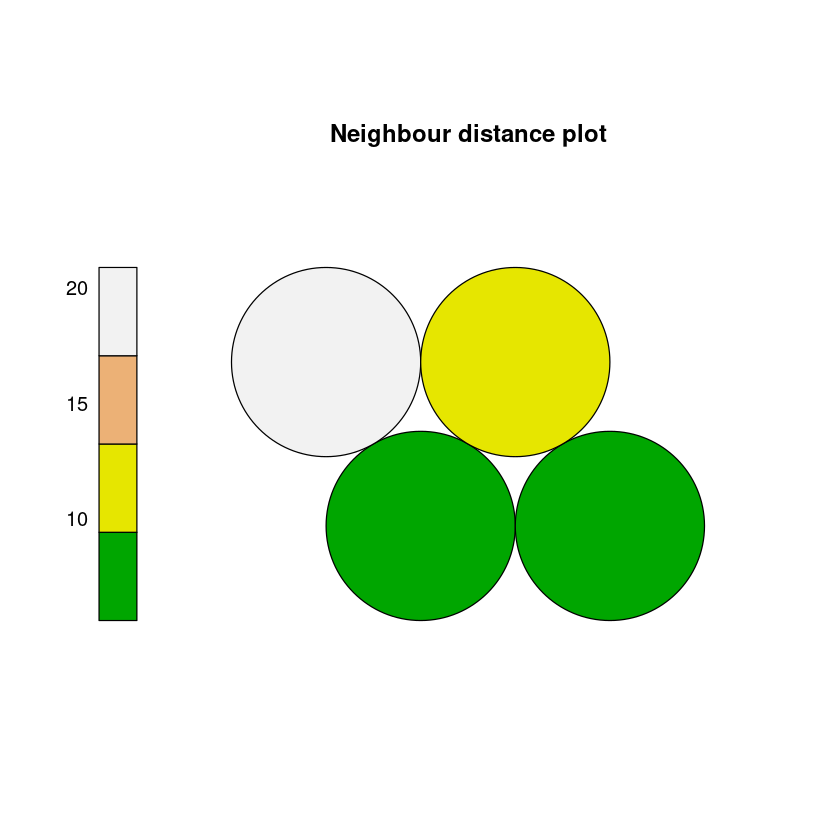

In [68]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.
b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

<h5>Respuestas</h5>

A) El método ***som*** funciona de la siguiente manera:
- El tamaño de la grilla del mapa es definido
- A cada celda en la grilla se le asiga un vector inicializador en el espacio de los datos
- Los datos son repetidamente alimentados al modelo para entrenarlo. Cada vez que un vector de entrenamiento es ingresado, el proceso siguiete toma lugar:
 - La celda de la grilla con el vector representativo más cercano al vector de entrenamiento es identificado
 - Todos los vecotres representativos de las celdas cercanas a la identificada son ligeramente ajustados al vector de entrenamiento
- Varios parámetros de convergencia fuerzan los ajustes par que sean cada vez mas pequeños a la vez que los vectores de entrenamiento con alimentados varias veces, causando que el mapa se estabilize en una representación

Los parámetros que recibe son los siguientes:

|Parámetro|Descripción|
|---|---|
|data|Una matriz, con cada fila representando un objeto|
|grid|Una grilla para los representativos|
|rlen|El numero de veces que el dataset completo sera presentado a la red|
|alpha|Ratio de aprendizaje, un vector de dos numeros indicando la cantidad de cambio|
|radius|El radio de la vecindad, puede ser un numero o un vector|
|init|Los representativos iniciales, representados como una matriz|
|toroidal|Si es **TRUE**, los bordes del mapa se unen|
|n.hood|La forma de la vecindad, puede ser *circular* o *cuadrado*|
|keep.data|Si es **TRUE**,retorna la data original y la informacion de mapeo|

B)

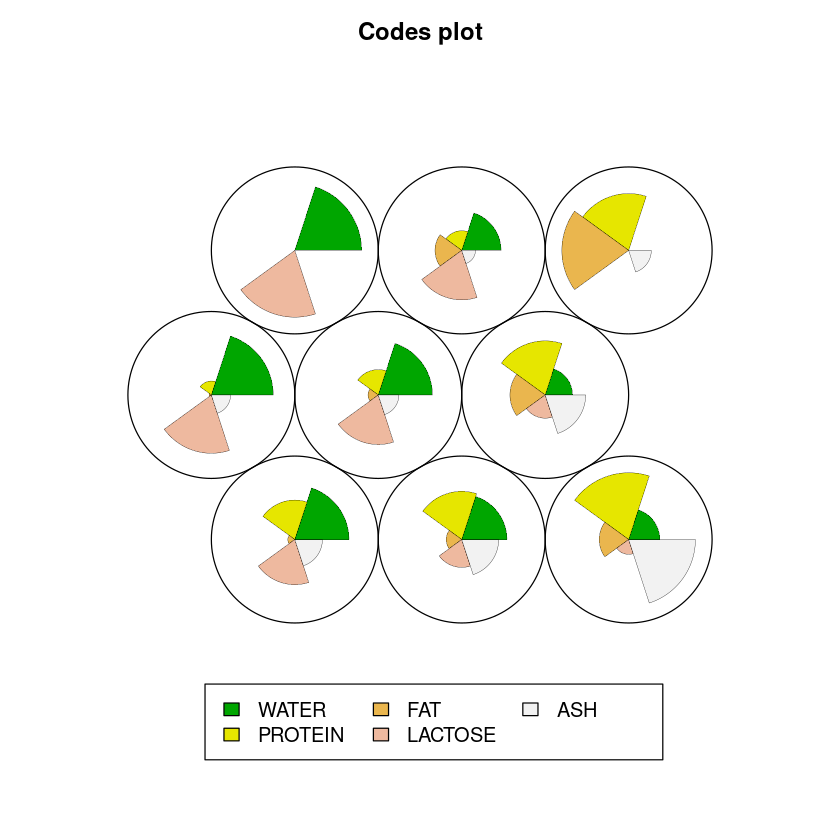

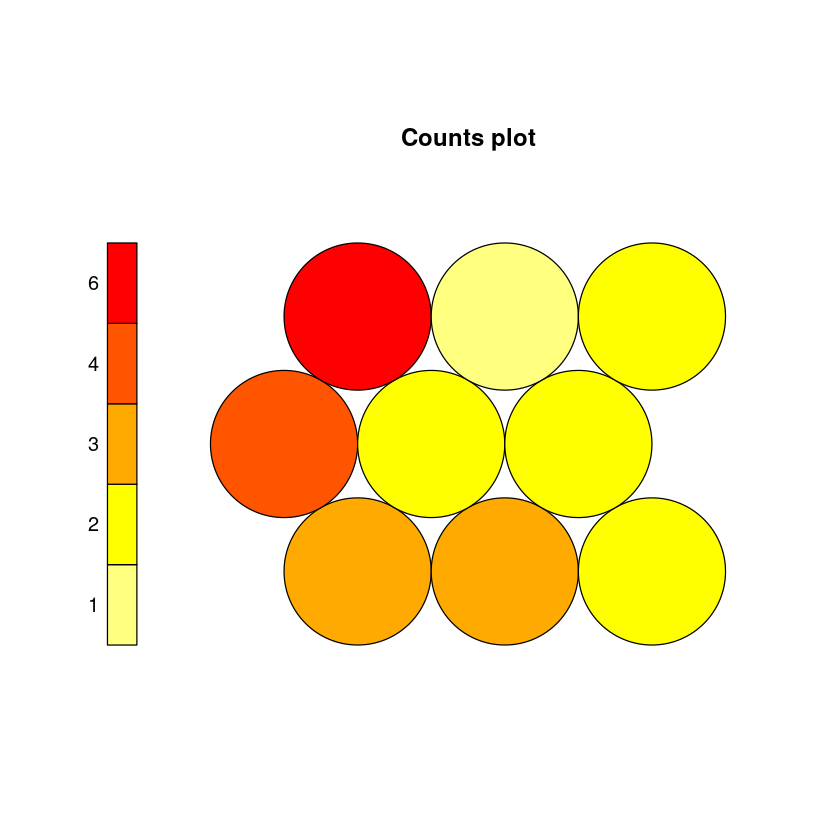

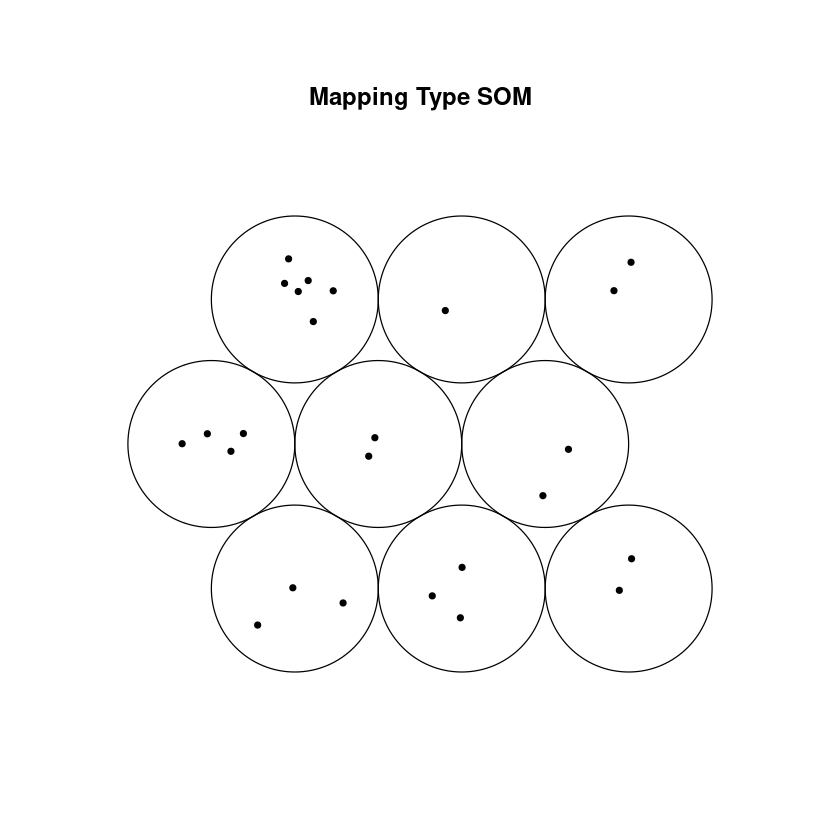

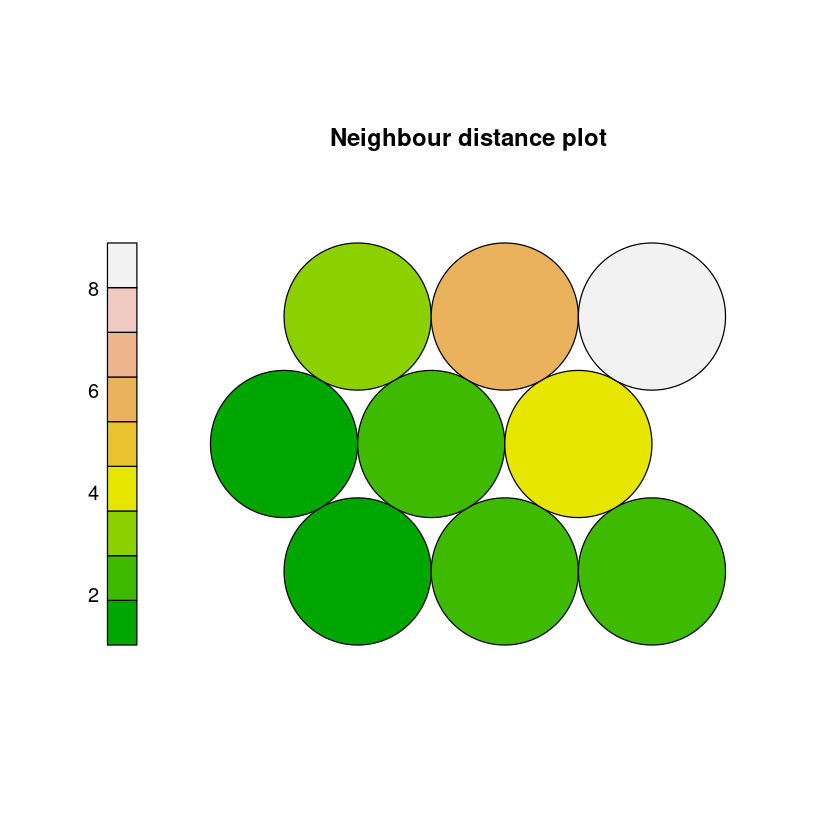

In [73]:
sommap <- som(scale(datos), grid = somgrid(3, 3, "hexagonal"), rlen=50, radius=2)
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

Lo más evidente, después de cambiar los parámetros de entrada de *som*, es que ahora tenemos una visualización de los datos en un mapa de 3x3. Cada nodo del som tiene menos elementos que en el som anterior, esto se debe a que el algoritmo busca agrupar los datos más parecidos en un mayor número de nodos dados, que en este caso son 9, esto se traduce en que algunos nodos puedan tener un minimo de 1 elemento.

Se puede observar en el grafico de distancia de los vecinos (neighbour distance plot) que existen nodos donde sus vecinos son mucho más cercanos que en el primer *som*.

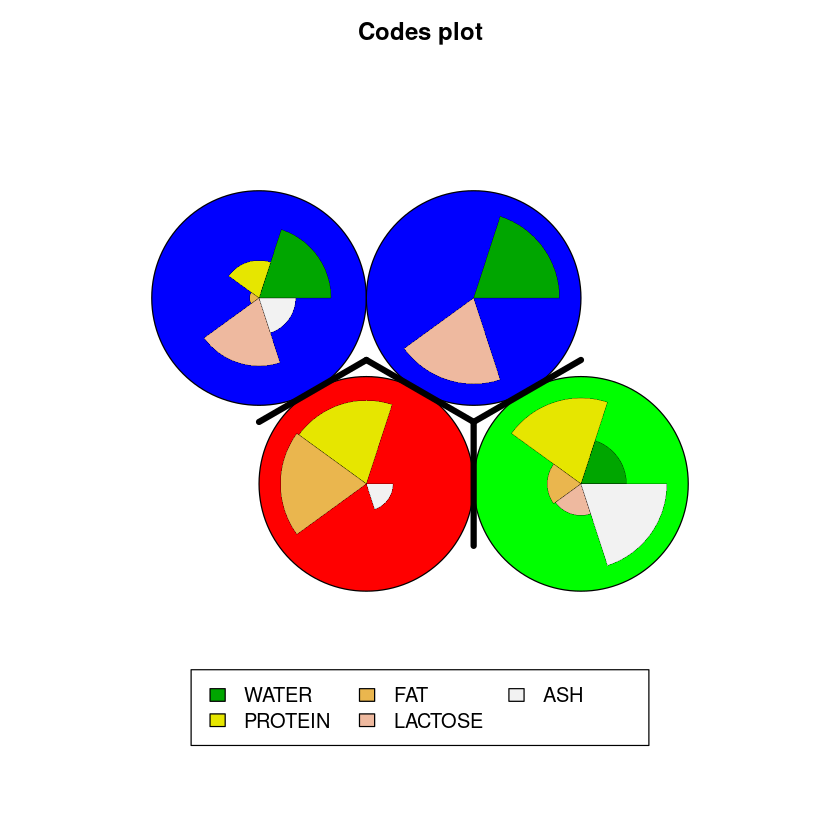

In [33]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

b) Interprete y comente los resultados obtenidos. 

<h6>A)</h6>
Esta visualización colorea los nodos del *som* de acuerdo a un código de colores, cada color representa un cluster del agrupamiento jerárquico de los datos, las lineas de frontera marcan una separación entre los cluster; a su vez se muestra al interior de cada nodo la distribución de las características comunes entre los datos del nodo.

<h6>B)</h6>
Se hace una partición del mapa en 3 cluster bien definidos. Un cluster **azul** cuyas características es que tiene una alta cantidad de Agua y Lactosa.
El cluster **rojo** tiene elementos con una alta cantidad de Grasa y Proteína.
Por último, el cluster **verde** contiene a los datos con la mayor proporción de Minerales y Grasa.

Ejercicio 3: 

a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones y discuta sus resultados.

<h6>A)</h6>

El set de datos propuesto al cual se le aplicará el algoritmo es el <a href=https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite)>Statlog(Landsat Satellite) Dataset</a>.
Este dataset se compone de valores multi-espectrales de pixeles en una vecindad de 3x3 en una imagen satelital. La meta es predecir la clasificacion dados los valores del espectro. Estos datos fueron obtenidos de datos de imagenes del ***Landsat Multi-Spectral Scanner*** de la NASA. El hecho de que los datos sean de pixeles de una imagen lo hacen ideal para un SOM, ya que así se puede ver de forma visual su clasificación.


El dataset consiste en una pequeña area de una imagen de 2340x3380, precisamente un área de 82x100 pixeles. Cada fila corresponde a un cuadrado de 3x3 pixeles completamente contenidos en la sub-area de 82x100. Cada linea contiene los valores del pixel en las 4 bandas espectrales de cada uno de los 9 pixeles contenidos en el cuadrado de 3x3 (4 bandas x 9 pixeles = 36 atributos). Cada atributo presenta un valor entre 0-255.


Para evitar efectos indeseados en los vecindarios que se encuentran en la frontera de la imagen, se usaran los atributos que corresponden al pixel central de la vecindad, es decir, los atributos 17,18,19,20. Además, se usara el set de entrenamiento ($4435$ datos) y el set de prueba ($2000$ datos) en su conjunto lo que nos dara un total de $6435$ datos.

In [2]:
sat_data <-read.table("sat.trn",dec=" ")
sat_class <- sat_data[37]
sat_data <- as.data.frame(sat_data[17:20])

summary(sat_data)

      V17              V18              V19              V20       
 Min.   : 40.00   Min.   : 27.00   Min.   : 50.00   Min.   : 29.0  
 1st Qu.: 60.00   1st Qu.: 71.00   1st Qu.: 85.00   1st Qu.: 69.0  
 Median : 68.00   Median : 85.00   Median :100.00   Median : 81.0  
 Mean   : 69.05   Mean   : 83.17   Mean   : 99.15   Mean   : 82.6  
 3rd Qu.: 79.00   3rd Qu.:103.00   3rd Qu.:113.00   3rd Qu.: 92.0  
 Max.   :104.00   Max.   :130.00   Max.   :145.00   Max.   :157.0  

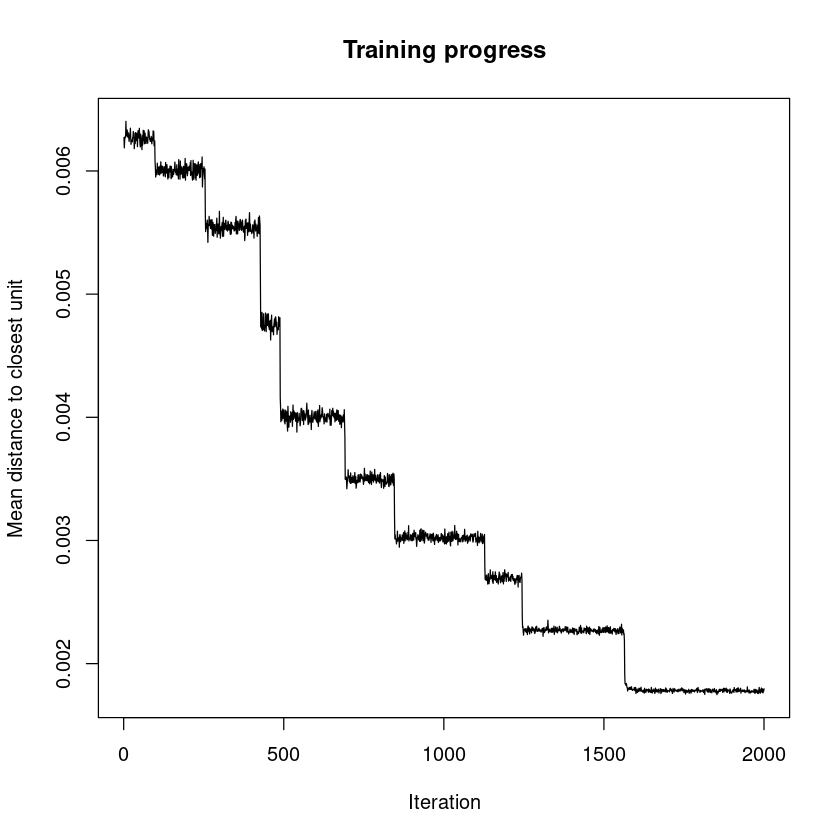

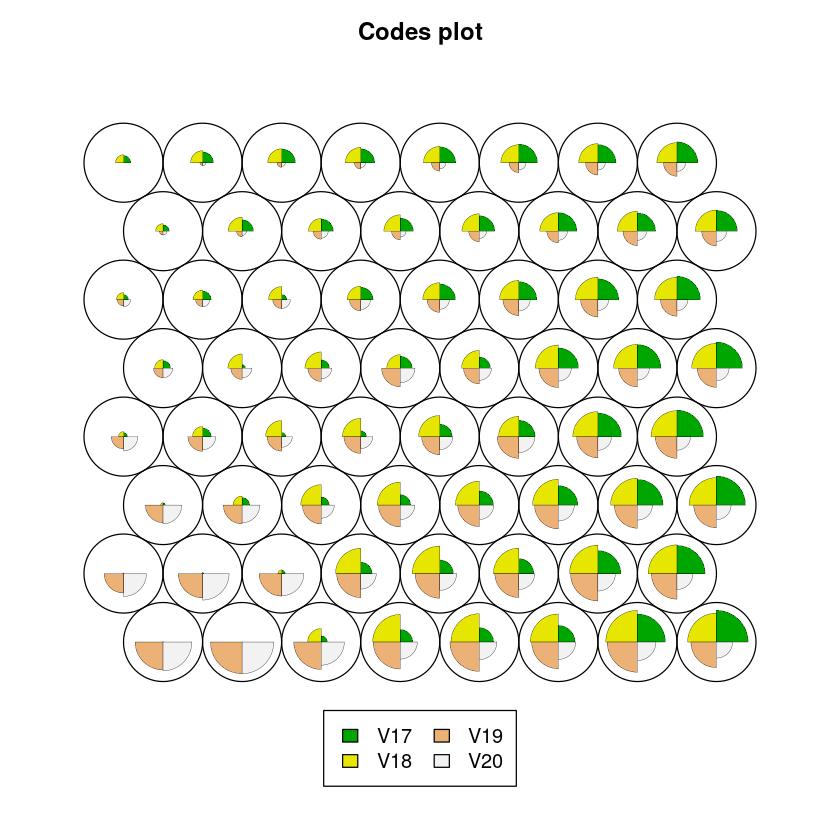

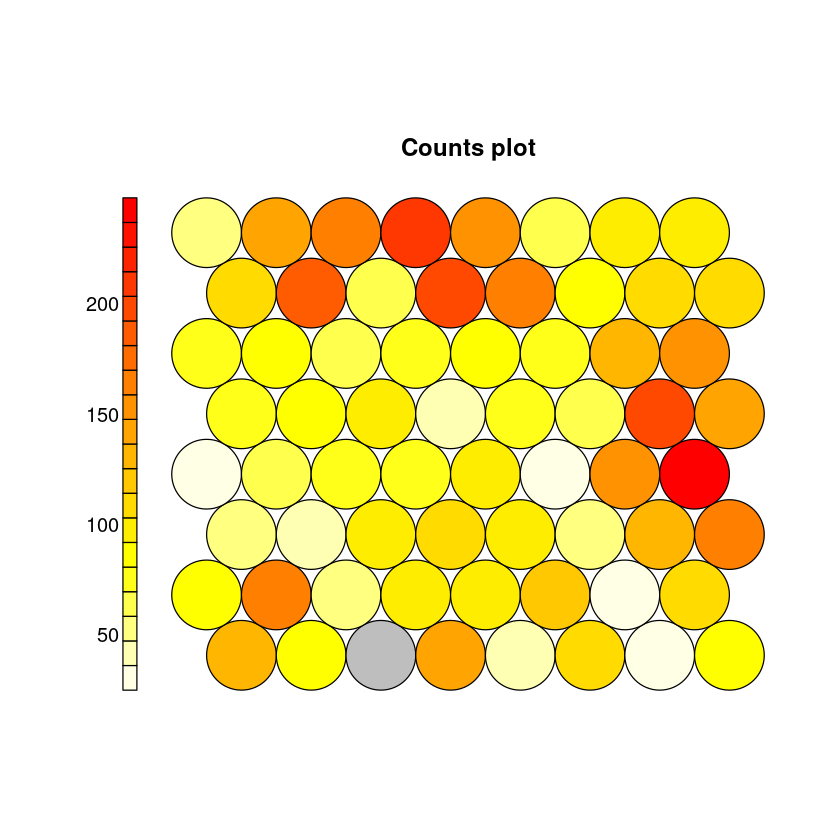

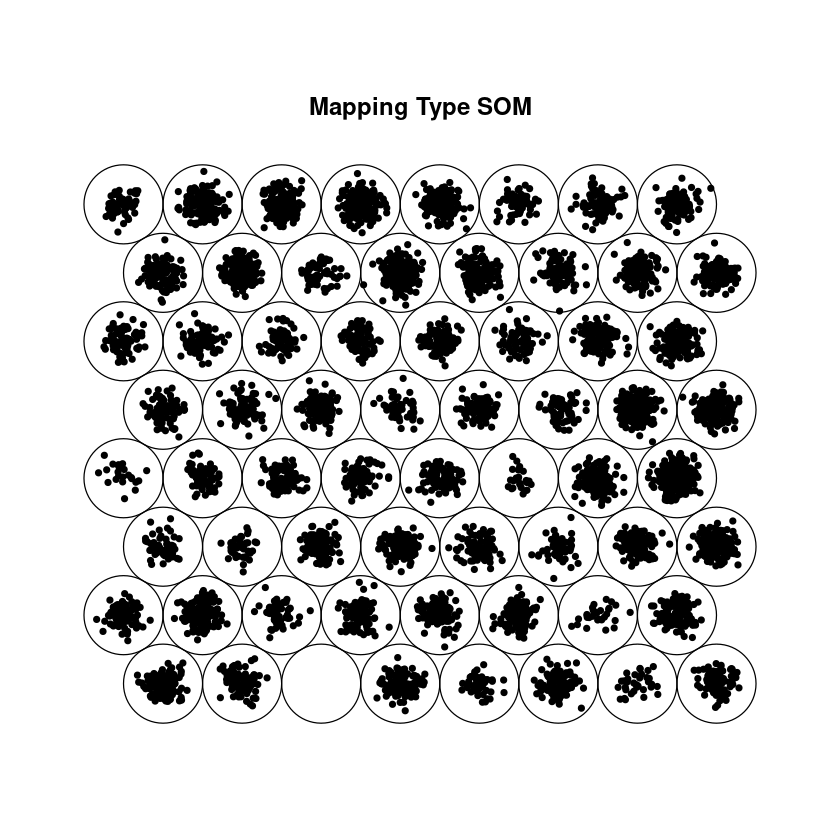

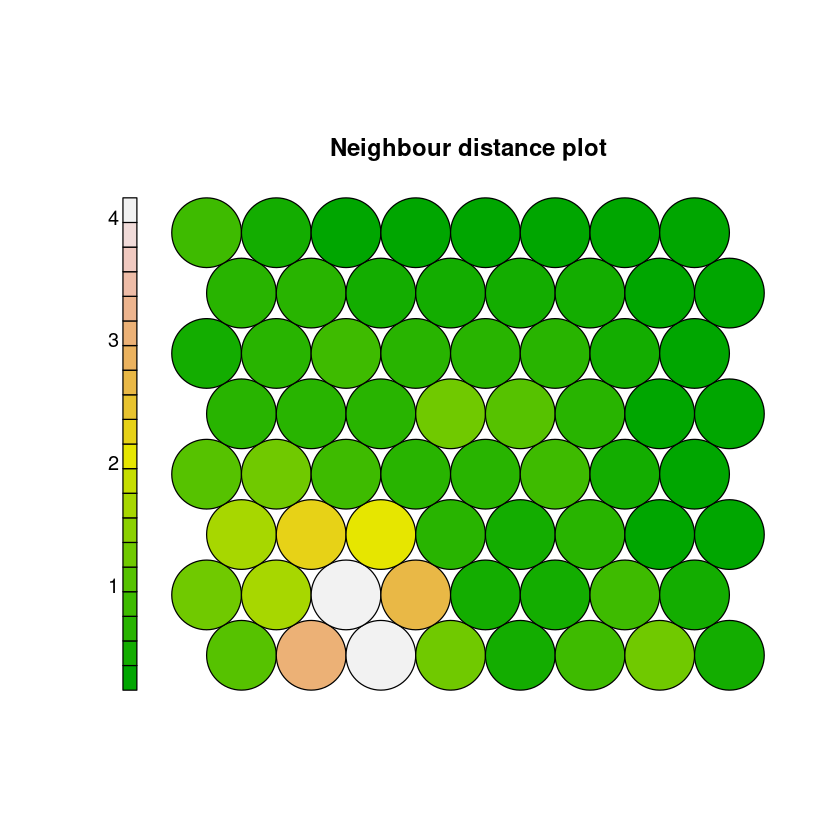

In [19]:
require('kohonen')
sat_sommap <- som(scale(sat_data), grid = somgrid(8,8, "hexagonal"), cores=-1, rlen=2000)

plot(sat_sommap, type="changes")

plot(sat_sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sat_sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sat_sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sat_sommap, type = "dist.neighbours", palette.name = terrain.colors)

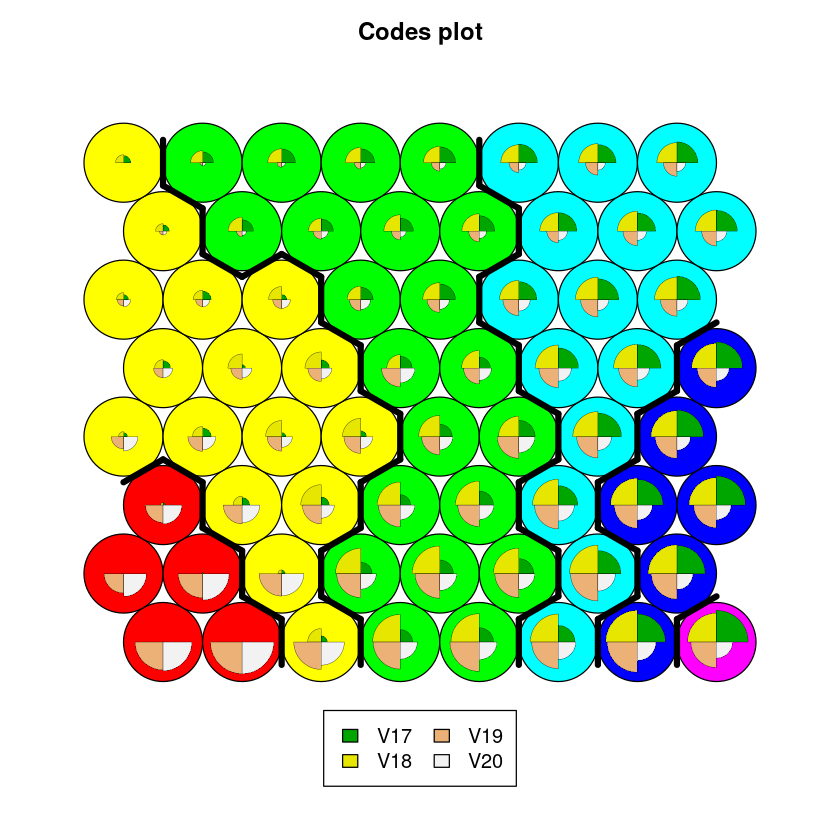

In [20]:
sat_mat <- matrix(sat_sommap$codes[[1]], byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
sat_groups <- 6
sat_som.hc <- cutree(hclust(dist(sat_mat)), sat_groups)

#plot
plot(sat_sommap, type="codes", bgcol=rainbow(sat_groups)[sat_som.hc])

#cluster boundaries
add.cluster.boundaries(sat_sommap, sat_som.hc)


<h6>B)</h6>

En el gráfico de *Code plot* podemos ver el patrón de la distribución de los datos y variables en el mapa. Se puede apreciar una especie de gradiente que va desde la esquina superior izquierda, donde se concentran datos con valores bajos para cada atributo, hacia la esquina inferior derecha donde encontramos magnitudes mas altas de las variables.

En el segundo gráfico vemos el conteo de cuantos datos hay en cada nodo del mapa. Existen áreas en el mapa que concentran una gran cantidad de puntos (>200), así como una gran cantidad de nodos con una cantidad de datos similar y una cantidad reducida de nodos con menos de 50 ejemplos. Aunque existe un nodo sin datos, lo que podría sugerir que el mapa es muy grande, tenemos también areas del mapa con una gran concentración de datos que incrementarían su concentración si se usara un mapa más pequeño, por ahora se considera el tamaño del mapa prudente.

El *neighbour distance plot* nos indica que tenemos muchos nodos similares, con distancias menores que 2, sin embargo, existe un área pequeña del mapa que es bastante disímil.

Al aplicar agrupamiento jerárquico en el SOM con 6 grupos(numero de clases según el dataset) podemos ver cuántos nodos estan asociados a cada clase, existen tres clases que tienen menos de 6 nodos asociados y tres clases que tienen una concentración mayor de nodos (>15)